# BIGMART SALES DATA ANALYISIS AND PREDICTIONS.

### **We have Big Mart Sales Data (8523) which  has both input and output variable(s). We need to build a ML model for future sales predictions.**



*   Item_Identifier: Unique product ID.
*   Item_Weight: Weight of product.
*   Item_Fat_Content: Whether the product is low fat or not.
*   Item_Visibility: The % of total display area of all products in a
store allocated to the particular product.
*   Item_Type: The category to which the product belongs.
*   Item_MRP: Maximum Retail Price (list price) of the product.
*   Outlet_Identifier: Unique store ID.
*   Outlet_Establishment_Year: The year in which store was established.
*   Outlet_Size: The size of the store in terms of ground area covered.
*   Outlet_Location_Type: The type of city in which the store is located.
*   Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket.
*   Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

### **IMPORTING DEPENDENCIES**

In [ ]:
from posixpath import split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### **DATA COLLECTION**

In [ ]:
# LOADING THE DATASET
bigmart_df = pd.read_csv('/content/bigmart.csv')

##**OVERVIEW OF DATA.**

### **FUNCTION TO GET CATEGOIRICAL COLUMN NAMES.**





In [ ]:

def get_categorical_columns(df):
 categorical_columns = []
 for column in df.columns:
    if df[column].dtype.name == "object":
      categorical_columns.append(column)

 return categorical_columns


In [ ]:
categorical_cols = get_categorical_columns(bigmart_df)
print(categorical_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


###**FUNCTION TO GET NUMERICAL COLUMN NAMES.**

In [ ]:
def get_numerical_columns(df):
 numerical_columns = []
 for column in df.columns:
    if df[column].dtype.name == "int64" or df[column].dtype.name == "float64":
      numerical_columns.append(column)

 return numerical_columns

In [ ]:
numerical_cols = get_numerical_columns(bigmart_df)
print(numerical_cols)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


### **GENERATING CATEGORICAL FEATURES DATA FRAME**

In [ ]:
categorical_features = bigmart_df.select_dtypes(include=[object])
categorical_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2


###**GENERATING NUMERICAL FEATURES DATA FRAME**

In [ ]:
numerical_features = bigmart_df.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


### **NUM OF UNIQUE VALUES IN EACH COLUMN**

In [ ]:
bigmart_df.apply(lambda x : x.nunique())

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### **FREQUENCY OF CATEGORIES**

In [ ]:
for col in categorical_cols:
    print('\n%s column: '%col)
    print(bigmart_df[col].value_counts())


Item_Identifier column: 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018

### **FREQUENCY OF NUMERICAL COLS (TOP 10)**

In [ ]:
for col in numerical_cols:
    print('\n%s column: '%col)
    print(bigmart_df[col].value_counts().head(10))



Item_Weight column: 
12.15    86
17.60    82
13.65    77
11.80    76
15.10    68
9.30     68
10.50    66
16.70    66
19.35    63
20.70    62
Name: Item_Weight, dtype: int64

Item_Visibility column: 
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
0.135708      2
0.136286      2
0.052150      2
0.040912      2
0.078759      2
Name: Item_Visibility, dtype: int64

Item_MRP column: 
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
109.5228    6
196.5768    6
108.6912    5
143.2154    5
152.8366    5
Name: Item_MRP, dtype: int64

Outlet_Establishment_Year column: 
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Item_Outlet_Sales column: 
958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
1230.3984    14
1416.8224    13
539.2980     12
759.0120     12
1211.7560    12
Name: Item_Outlet_Sales, dtyp

## **IMPUTING MISSING VALUES**

In [ ]:
bigmart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**HANDLING MISSING VALUES**


*   MEAN --> AVERAGE VALUE
*   MODE --> MOST REPEATED VALUE




### **1. IMPUTING MISSING VALUES OF ITEM WIIGHTS WITH MEAN.**

In [ ]:
mean =bigmart_df['Item_Weight'].mean()

In [ ]:
# Filling the missing values with mean in item weight column
bigmart_df['Item_Weight'].fillna(value = mean,inplace=True)

In [ ]:
bigmart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### **2.HANDLING MISSING VALUES OF OUTLET SIZE.**

In [ ]:
# mode = bigmart_df['Outlet_Size'].mode()
# bigmart_df['Outlet_Size'].fillna(mode[0], inplace=True)

In [ ]:
mode_of_outlet_size = bigmart_df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
mode_of_outlet_size_loc = bigmart_df.pivot_table(values='Outlet_Size',columns='Outlet_Location_Type',aggfunc=(lambda x: x.mode()[0]))
print(mode_of_outlet_size_loc)

Outlet_Location_Type Tier 1 Tier 2  Tier 3
Outlet_Size           Small  Small  Medium


In [ ]:
pd.DataFrame(bigmart_df.groupby("Outlet_Location_Type")['Outlet_Size'].value_counts())


Outlet_Size
Outlet_Location_Type Outlet_Size             
Tier 1               Small               1458
                     Medium               930
Tier 2               Small                930
Tier 3               Medium              1863
                     High                 932

In [ ]:
pd.DataFrame(bigmart_df.groupby("Outlet_Type")['Outlet_Size'].value_counts())

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     Small                528
Supermarket Type1 Small               1860
                  High                 932
                  Medium               930
Supermarket Type2 Medium               928
Supermarket Type3 Medium               935

In [ ]:
new_df = bigmart_df[bigmart_df['Outlet_Size'].isna()]
new_df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
new_df['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [ ]:
new_df['Outlet_Location_Type'].value_counts()

Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [ ]:
tier2 = new_df[new_df['Outlet_Location_Type']=='Tier 2']
tier2['Outlet_Size'].fillna(value='Small',inplace=True)
tier2

<ipython-input-133-93befffe1b08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tier2['Outlet_Size'].fillna(value='Small',inplace=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,Small,Tier 2,Supermarket Type1,838.9080
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,Small,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.60,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,Small,Tier 2,Supermarket Type1,2428.8384
...,...,...,...,...,...,...,...,...,...,...,...,...
8501,FDW21,5.34,Regular,0.005998,Snack Foods,100.4358,OUT017,2007,Small,Tier 2,Supermarket Type1,1508.0370
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,Small,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,Small,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,Small,Tier 2,Supermarket Type1,468.7232


In [ ]:
tier3= new_df[new_df['Outlet_Location_Type']=='Tier 3']
tier3['Outlet_Size'].fillna(value='Medium',inplace=True)
tier3


<ipython-input-134-bd209c4c5d6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tier3['Outlet_Size'].fillna(value='Medium',inplace=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Medium,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Medium,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,Medium,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,Medium,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,Medium,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Medium,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,Medium,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Medium,Tier 3,Grocery Store,45.2744


In [ ]:
bigmart_df.shape

(8523, 12)

In [ ]:
df1= bigmart_df.dropna()
df1.shape

(6113, 12)

In [ ]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [ ]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
bigmart_df_final = pd.concat([df1,tier2,tier3])
bigmart_df_final.shape

(8523, 12)

In [ ]:
bigmart_df_final.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
bigmart_df_final['Outlet_Size'].value_counts()

Small     4243
Medium    3348
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
bigmart_df_final.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### **3.VISIBILITY CANNOT BE ZERO SO WE IMPUTE THE MISSING VALUES BY REPLACING THEM WITH THE MEAN.**

In [ ]:
avg_vissibility = bigmart_df_final['Item_Visibility'].mean()
avg_vissibility


0.06613202877895108

In [ ]:
bigmart_df_final['Item_Visibility'].replace(to_replace = 0,value =avg_vissibility , inplace=True)

In [ ]:
bigmart_df_final.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914
std,4.226124,0.048742,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#Get the first two characters of ID:
bigmart_df_final['Item_Type_Combined'] = bigmart_df_final['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
bigmart_df_final['Item_Type_Combined'] = bigmart_df_final['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
bigmart_df_final['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [ ]:
bigmart_df_final.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food


## **UNI-VARIATE ANALYISIS.**

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})

### **ITEM TYPE VS COUNT.**

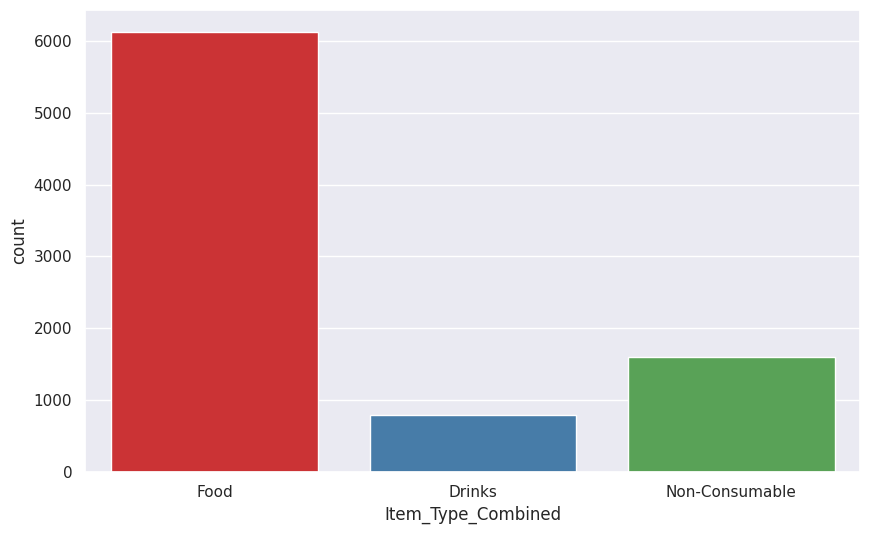

In [ ]:
sns.countplot(x='Item_Type_Combined',data=bigmart_df_final,palette='Set1')
plt.show()

<Axes: xlabel='Item_Type_Combined', ylabel='Item_Outlet_Sales'>

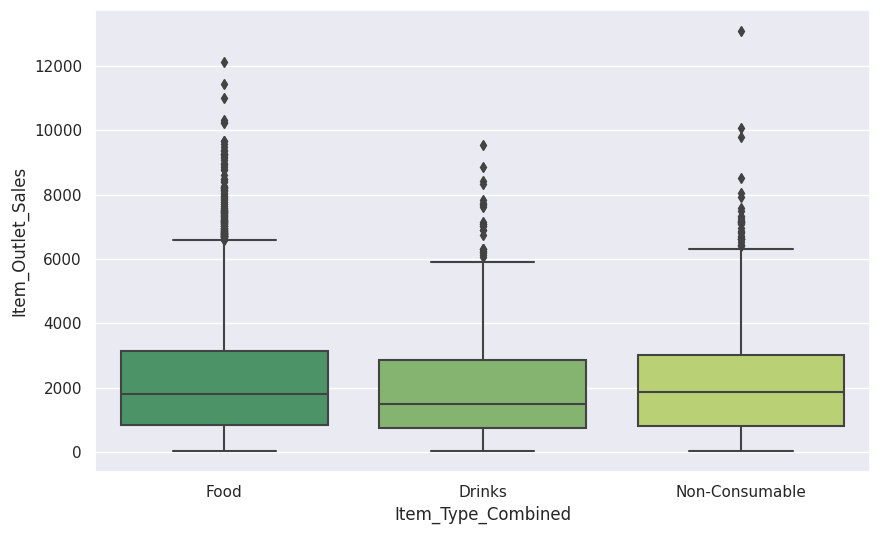

In [ ]:
sns.boxplot(x='Item_Type_Combined',y='Item_Outlet_Sales',data=bigmart_df_final,palette='summer')

### **ITEM WEIGHT DISTRIBUTION**

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})

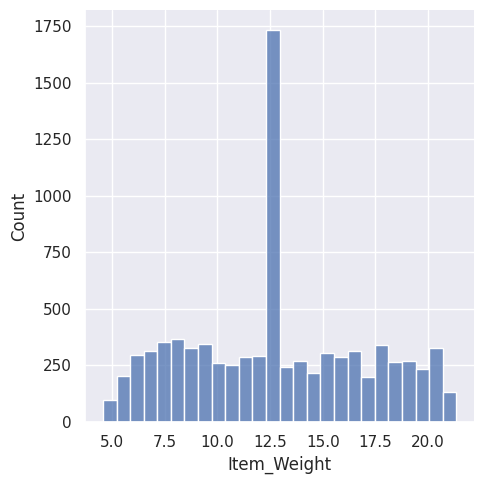

In [ ]:
# plt.figure(figsize=(12,10))
sns.displot(data = bigmart_df_final['Item_Weight'])
plt.show()

In [ ]:
bigmart_df_final['Item_Weight'].skew()

0.09056145191767477

Observation: There are many items wiich weights around 12.

### **DISTRIBUTION OF ITEM VISIBILITY**

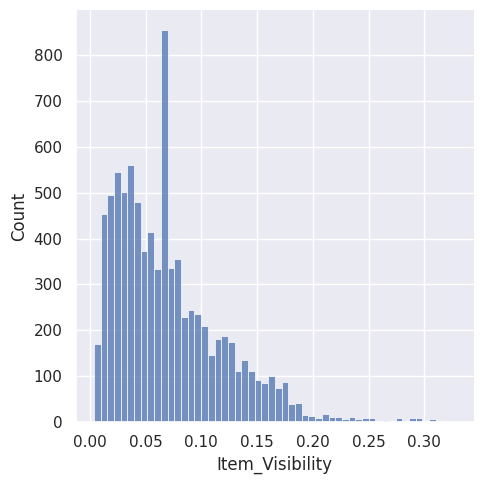

In [ ]:
# plt.figure(figsize=(12,10))
sns.displot(bigmart_df_final['Item_Visibility'])
plt.show()

In [ ]:
bigmart_df_final['Item_Visibility'].skew()

1.2868767983596106

### **DISTRIBUTION OF ITEM OUTLETS SALES**

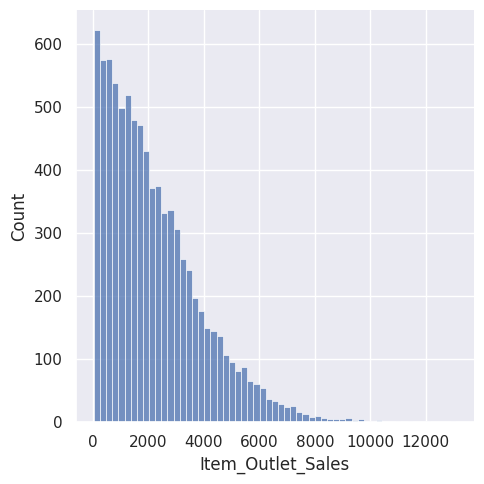

In [ ]:
sns.displot(bigmart_df_final['Item_Outlet_Sales'])
plt.show()

In [ ]:
bigmart_df_final['Item_Outlet_Sales'].skew()

1.1775306028542798

### **DISTRIBUTION OF ITEM MRP**

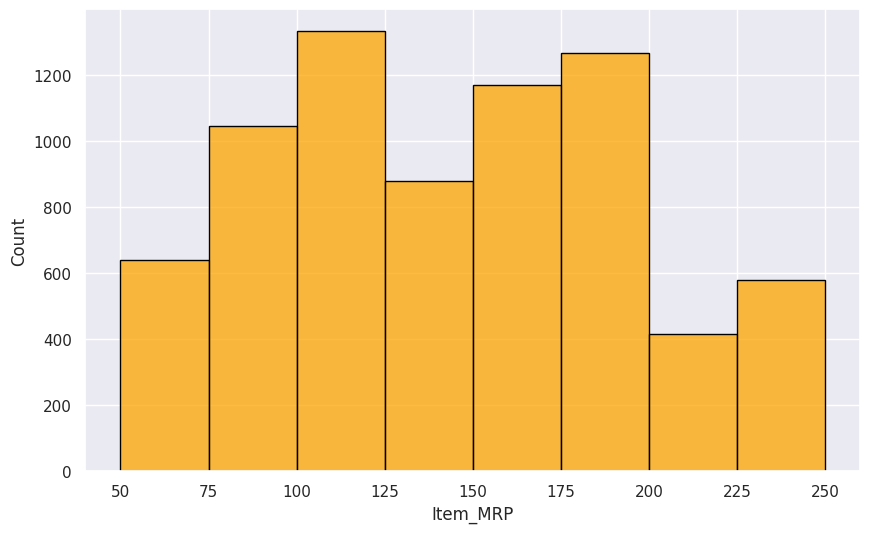

In [ ]:
sns.histplot(bigmart_df_final['Item_MRP'],bins=[50,75,100,125,150,175,200,225,250],color='orange', edgecolor='black')
plt.show()

Observation : Maximum items are in the range of 100-125 and 175-200 MRP.

In [ ]:
print(bigmart_df_final['Item_MRP'].max())
print(bigmart_df_final['Item_MRP'].min())

266.8884
31.29


### **ESTABLISHMENT YEAR COUNT PLOT**

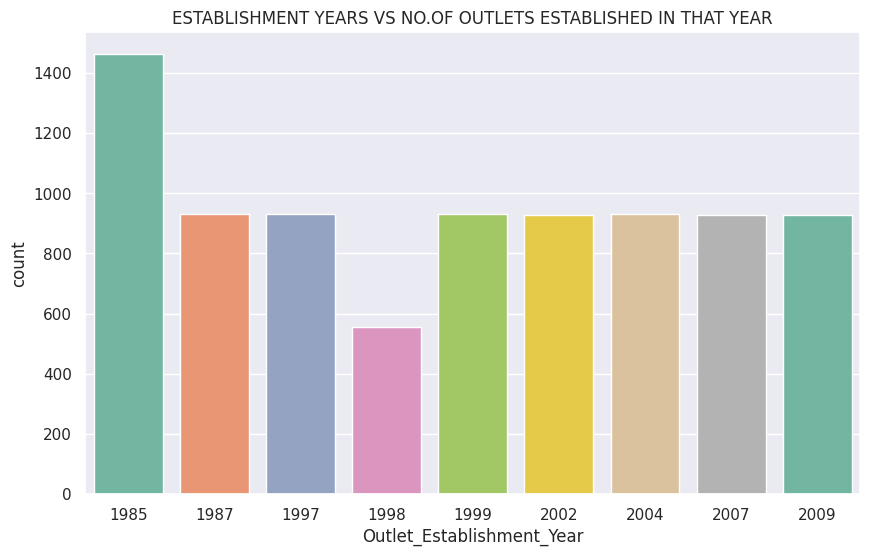

In [ ]:
sns.countplot(x='Outlet_Establishment_Year',data = bigmart_df_final,palette='Set2')
plt.title('ESTABLISHMENT YEARS VS NO.OF OUTLETS ESTABLISHED IN THAT YEAR')
plt.show()

### **ITEM FAT CONTENTS VS COUNT.**

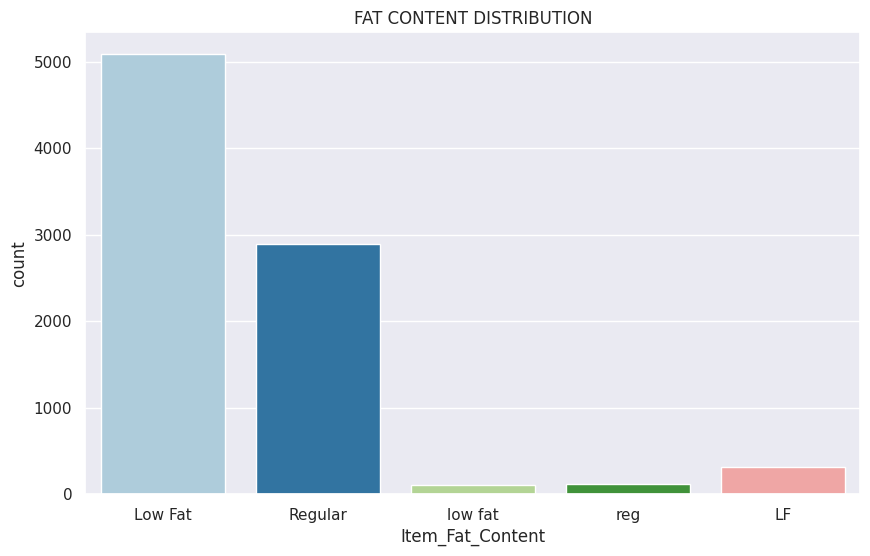

In [ ]:
sns.countplot(x='Item_Fat_Content',data=bigmart_df_final,palette='Paired')
plt.title('FAT CONTENT DISTRIBUTION')
plt.show()

**CLEANING THE FAT CONTENTS.**

In [ ]:
mapping = {
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
}

# Create a new column called `Item_Fat_Content_Combined` that combines the values of the `Item_Fat_Content` column
bigmart_df_final["Item_Fat_Contents"] = bigmart_df_final["Item_Fat_Content"].replace(mapping)


In [ ]:
bigmart_df_final.drop(columns=['Item_Fat_Content'],inplace=True)

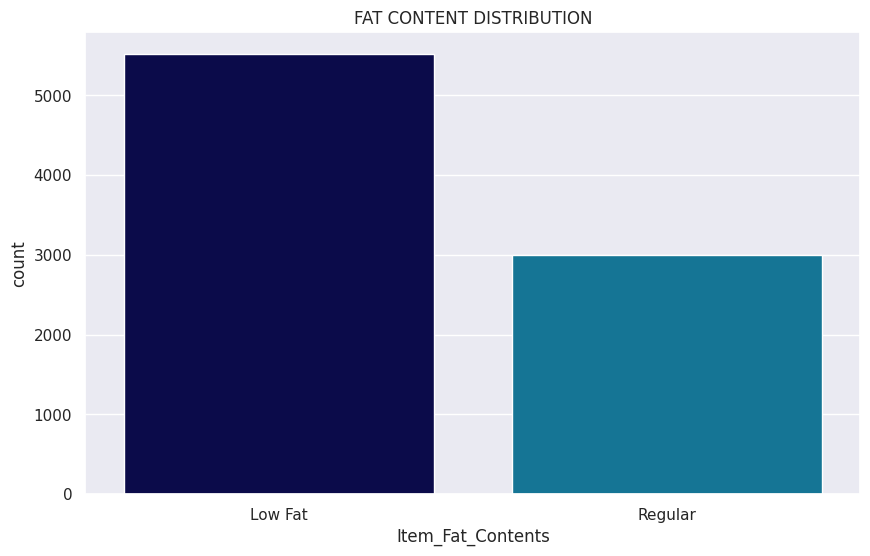

In [ ]:
sns.countplot(x='Item_Fat_Contents',data=bigmart_df_final,palette='ocean')
plt.title('FAT CONTENT DISTRIBUTION')
plt.show()

### **ITEM TYPE VS COUNT.**

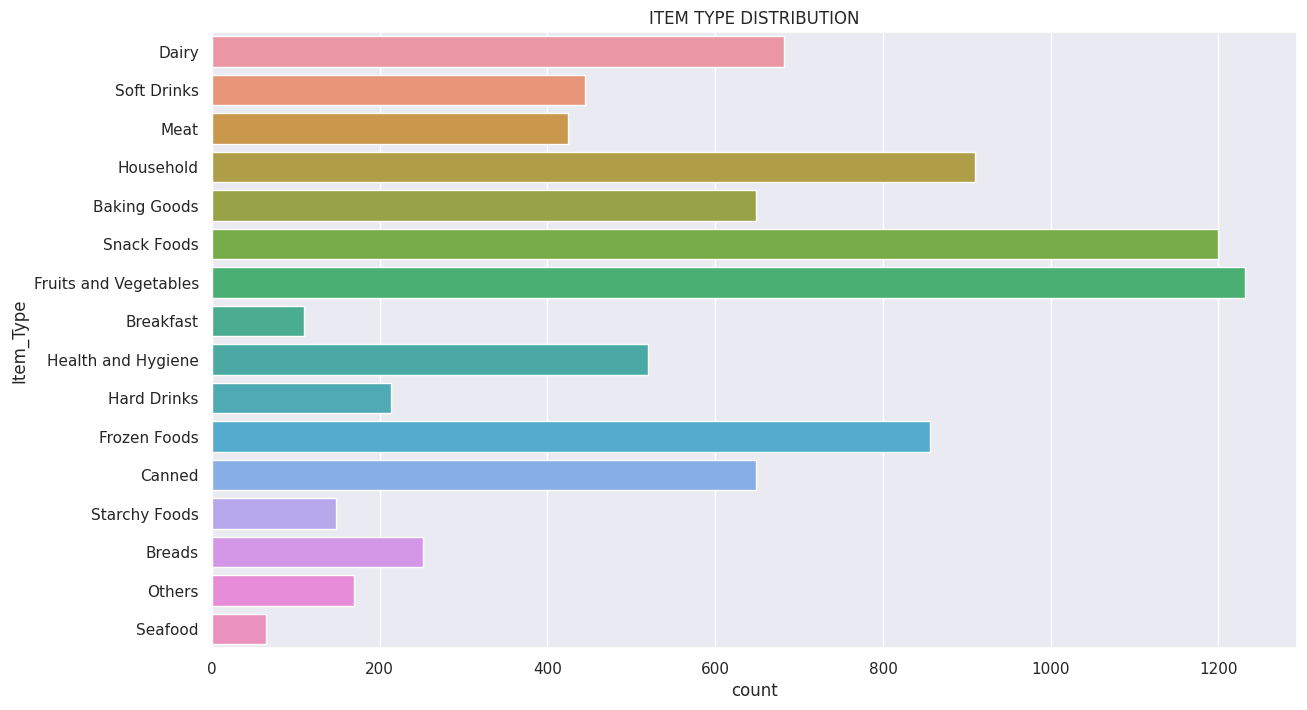

In [ ]:
sns.set(rc={"figure.figsize":(14, 8)})
sns.countplot(y='Item_Type',data=bigmart_df_final,orient="horizontal")
plt.title('ITEM TYPE DISTRIBUTION')
plt.show()

Observation: Snacks and foods also fruits and vegetables are available in bulk quantities.

### **OUTLET SIZE VS COUNT.**

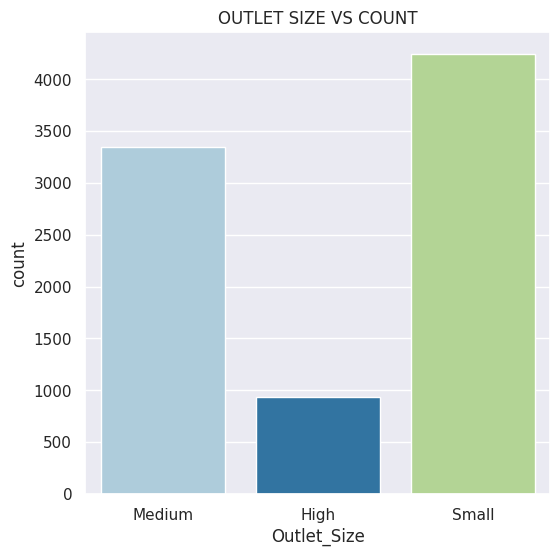

In [ ]:
sns.set(rc={"figure.figsize":(6, 6)})
sns.countplot(x='Outlet_Size',data=bigmart_df_final,palette='Paired')
plt.title('OUTLET SIZE VS COUNT')
plt.show()

### **OUTLET LOCATION VS COUNT.**

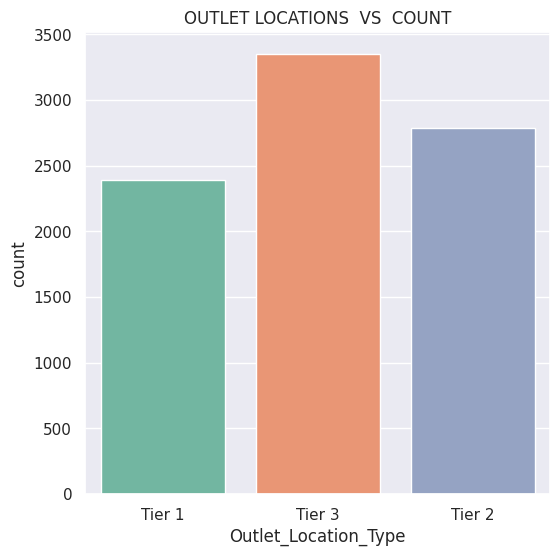

In [ ]:
sns.set(rc={"figure.figsize":(6, 6)})
sns.countplot(x='Outlet_Location_Type',data=bigmart_df_final,palette='Set2')
plt.title('OUTLET LOCATIONS  VS  COUNT')
plt.show()

### **OUTLET TYPE VS COUNT**

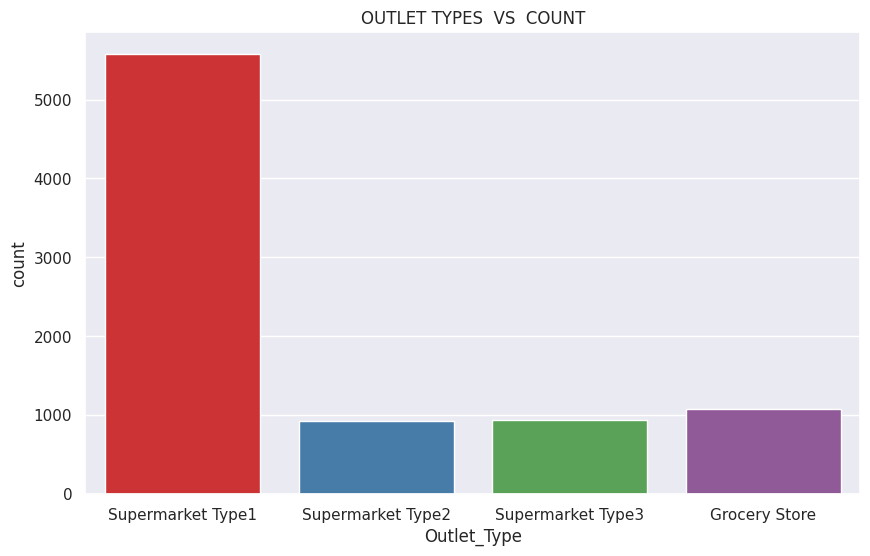

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.countplot(x='Outlet_Type',data=bigmart_df_final,palette='Set1')
plt.title('OUTLET TYPES  VS  COUNT')
plt.show()

Observation : Super market type 1 are suoerior to other outlets.

## **BI-VARIATE ANALYISIS.**

Text(0.5, 1.0, 'ITEM WEIGHT VS OUTLET SALES')

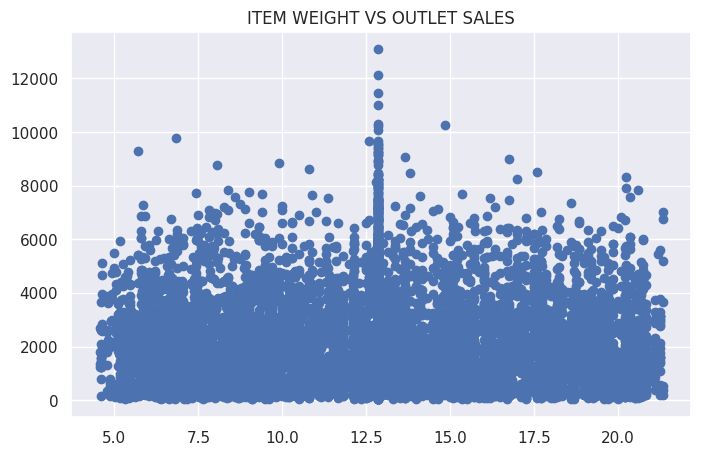

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_Weight',data=bigmart_df_final)
plt.title('ITEM WEIGHT VS OUTLET SALES')

Text(0.5, 1.0, 'ITEM Visibility VS OUTLET SALES')

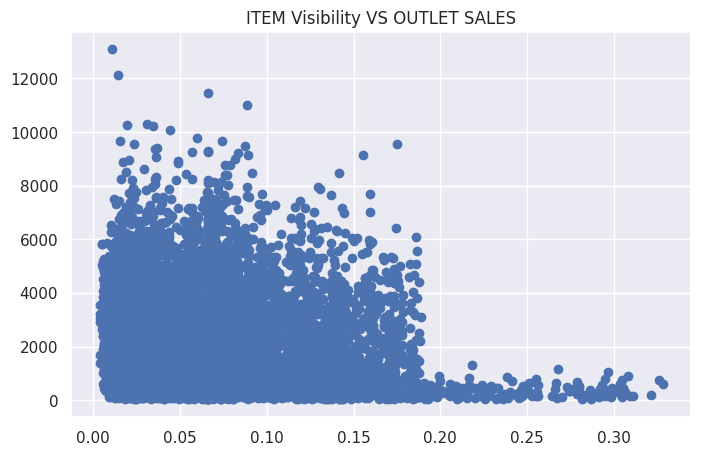

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_Visibility',data=bigmart_df_final)
plt.title('ITEM Visibility VS OUTLET SALES')

### **ITEM MRP VS SALES.**

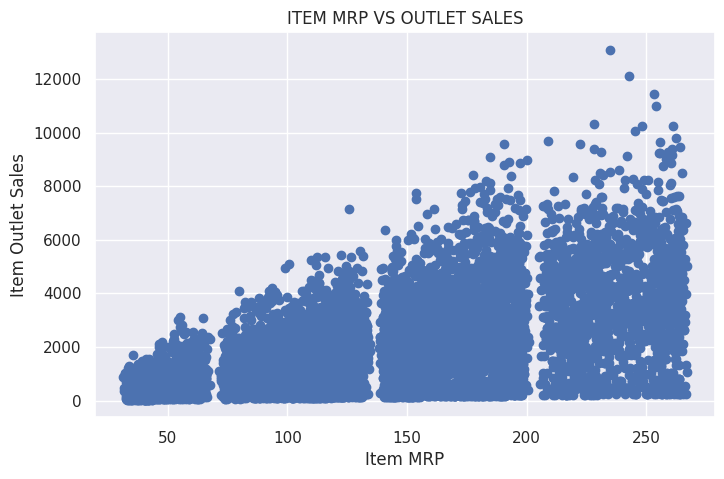

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=bigmart_df_final)
plt.title('ITEM MRP VS OUTLET SALES')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

**OBSERVATION:**
*   Items MRP ranging from 200-250 dollars is having high Sales.




### **RELATION BETWEEN TYPE OF OUTLET AND SALES**

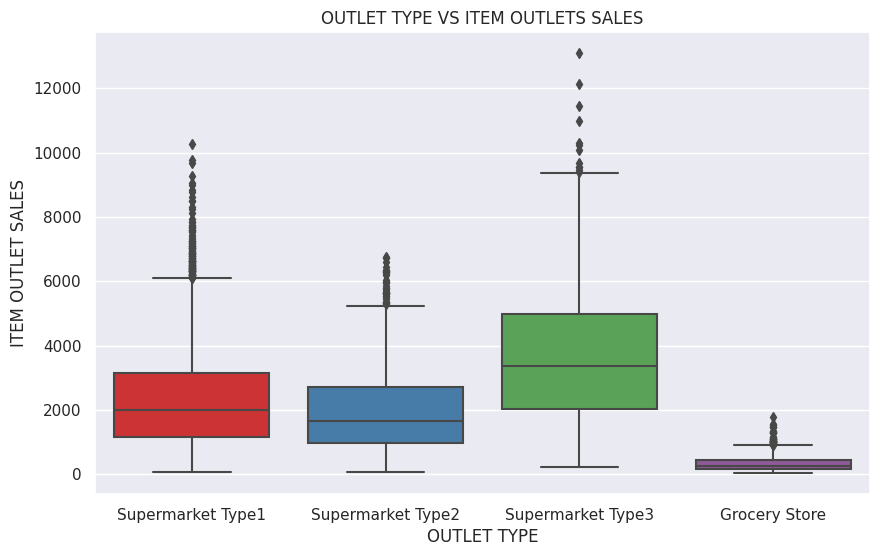

In [ ]:
sns.boxplot(x='Outlet_Type' ,y='Item_Outlet_Sales',data=bigmart_df_final,palette='Set1')
plt.title('OUTLET TYPE VS ITEM OUTLETS SALES')
plt.xlabel('OUTLET TYPE')
plt.ylabel('ITEM OUTLET SALES')
plt.show()


*   Observation: Supermarket type 3 is bringin in better sales but the count of super market 1 outlets are more so by decreasing S1 and increasing S3 outlets can fetch in more revenue.
*   Groccery stores are performing poorly. (assumption: majority of customers tend to by grocerrys from local vendors)





### **OUTLET LOCATION VS SALES.**

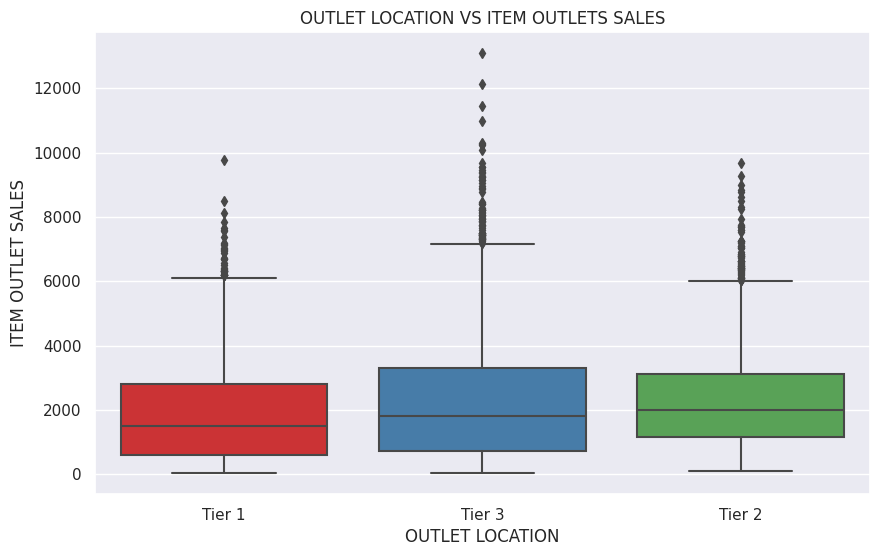

In [ ]:
sns.boxplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales',data=bigmart_df_final,palette='Set1')
plt.title('OUTLET LOCATION VS ITEM OUTLETS SALES')
plt.xlabel('OUTLET LOCATION')
plt.ylabel('ITEM OUTLET SALES')
plt.show()

### **OUTLETS WISE SALES.**

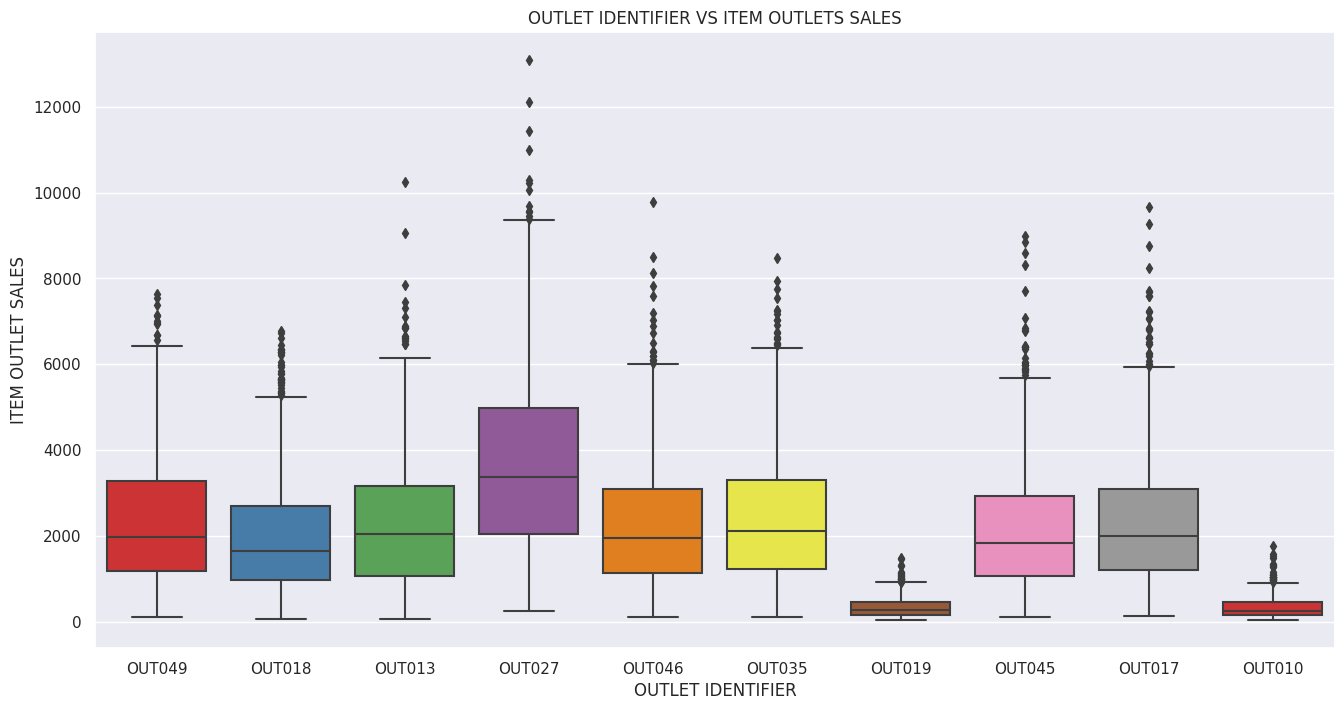

In [ ]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.boxplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales',data=bigmart_df_final,palette='Set1')
plt.title('OUTLET IDENTIFIER VS ITEM OUTLETS SALES')
plt.xlabel('OUTLET IDENTIFIER')
plt.ylabel('ITEM OUTLET SALES')
plt.show()

### **ITEM TYPE VS OUTLET SALES**

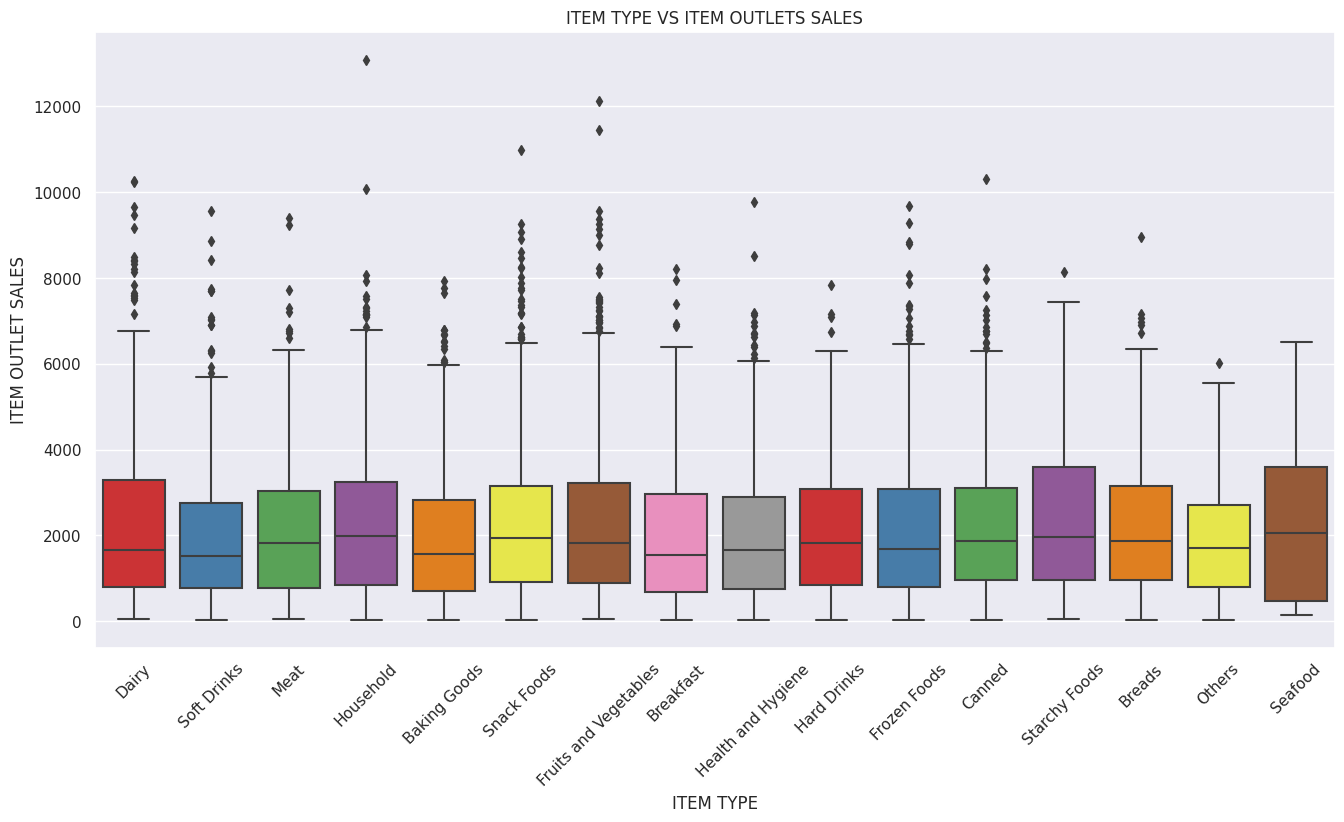

In [ ]:
sns.set(rc={"figure.figsize":(16, 8)})
ax = sns.boxplot(x='Item_Type' ,y='Item_Outlet_Sales',data=bigmart_df_final,palette='Set1')
plt.title('ITEM TYPE VS ITEM OUTLETS SALES')
plt.xlabel('ITEM TYPE')
plt.ylabel('ITEM OUTLET SALES')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

### **ITEM CATEGORY VS SALES**

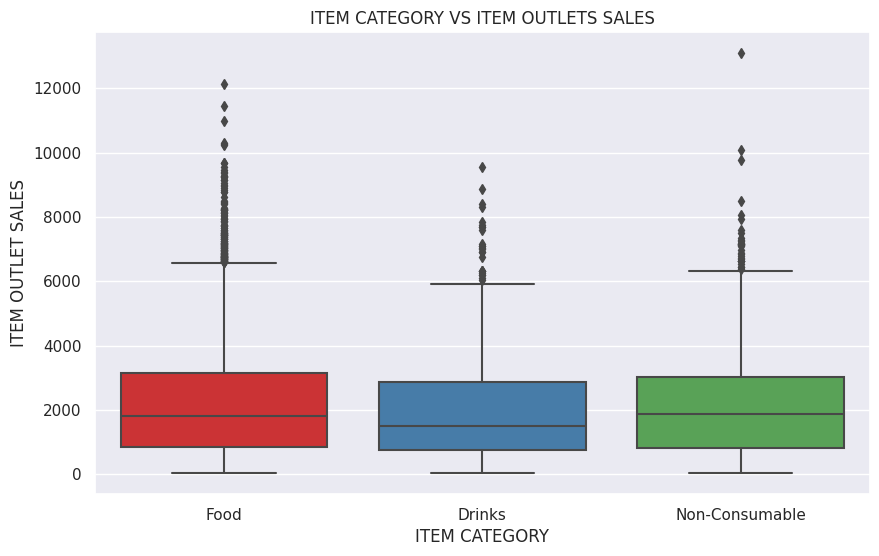

In [ ]:
sns.set(rc={"figure.figsize":(10,6)})
ax = sns.boxplot(x='Item_Type_Combined' ,y='Item_Outlet_Sales',data=bigmart_df_final,palette='Set1')
plt.title('ITEM CATEGORY VS ITEM OUTLETS SALES')
plt.xlabel('ITEM CATEGORY')
plt.ylabel('ITEM OUTLET SALES')

plt.show()

### **ITEM TYPE VS THERE CONTRIBUTION IN SALES**

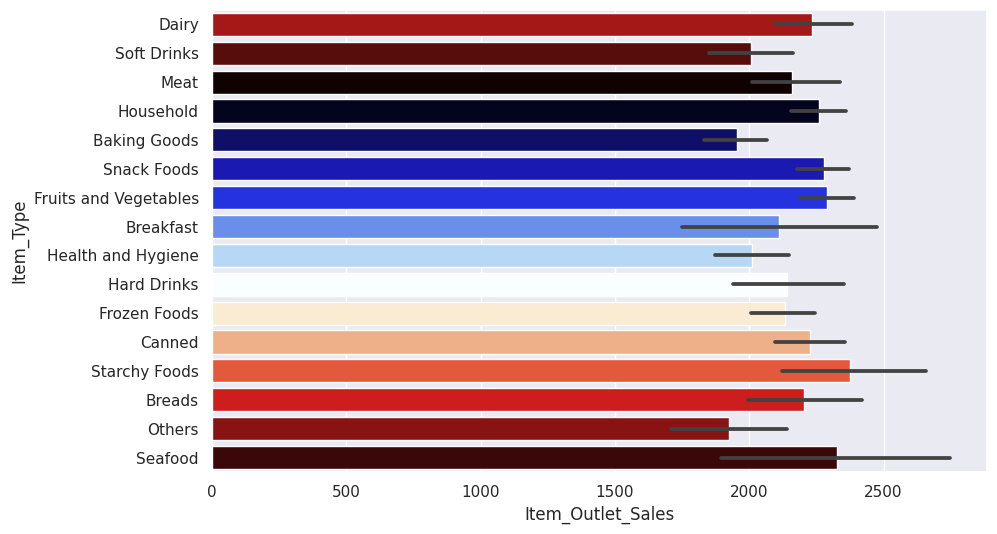

In [ ]:
sns.barplot(y=bigmart_df_final['Item_Type'],x=bigmart_df_final['Item_Outlet_Sales'],palette='flag')
plt.show()

 **OBSERVATION:**

*   The products that where available in more stocks where veggies,fruits,snacks but the sales where more for sea food and starchy food so having them in more stockm will increse the sales.



### **OUTLET SIZE VS ITEM OUTLETS SALES**

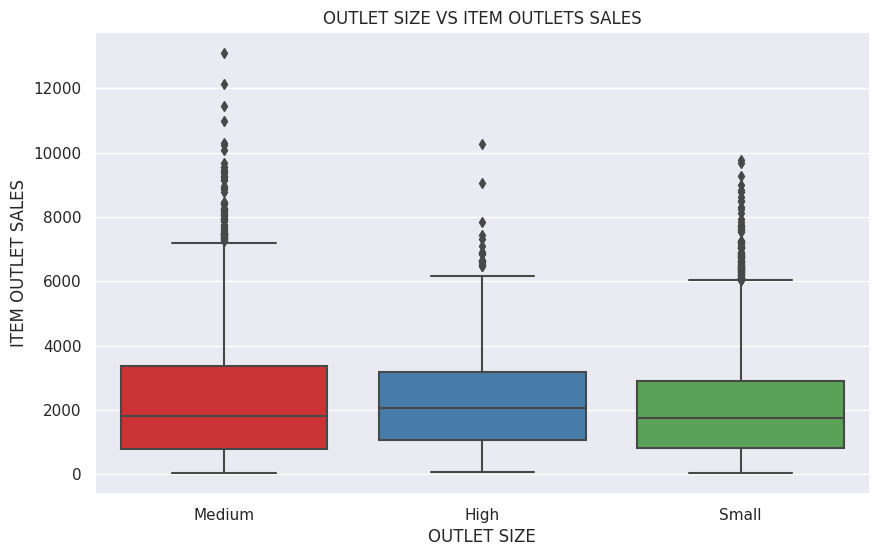

In [ ]:
sns.boxplot(x='Outlet_Size' ,y='Item_Outlet_Sales',data=bigmart_df_final,palette='Set1')
plt.title('OUTLET SIZE VS ITEM OUTLETS SALES')
plt.xlabel('OUTLET SIZE')
plt.ylabel('ITEM OUTLET SALES')
plt.show()

Observation: Medium size outlets are performing well but we havemore number of small size outlets so increasing medium outlets will bring more revenue.

### **ESATBLISMENT YEAR VS OUTLET SALES**

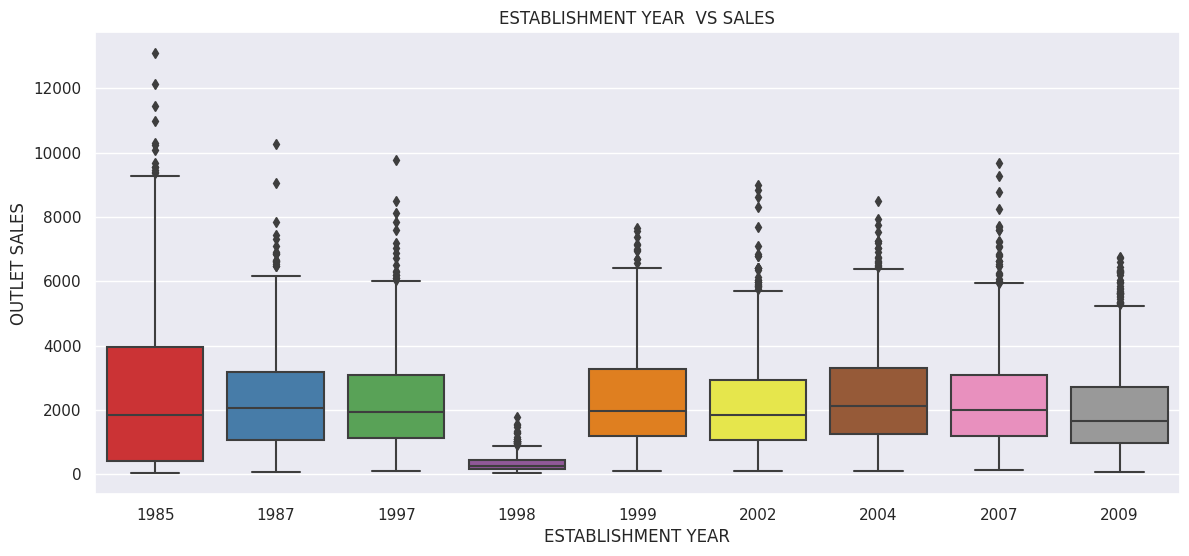

In [ ]:
sns.set(rc={"figure.figsize":(14,6)})
ax = sns.boxplot(x='Outlet_Establishment_Year' ,y='Item_Outlet_Sales',data=bigmart_df_final,palette='Set1')
plt.title('ESTABLISHMENT YEAR  VS SALES')
plt.xlabel('ESTABLISHMENT YEAR')
plt.ylabel('OUTLET SALES')
plt.show()

In [ ]:
bigmart_df_final.index = bigmart_df_final['Outlet_Establishment_Year']
bigmart_df_final.index

Int64Index([1999, 2009, 1999, 1987, 2009, 1987, 1985, 1999, 1997, 1999,
            ...
            1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998],
           dtype='int64', name='Outlet_Establishment_Year', length=8523)

In [ ]:
bigmart_df_final.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Fat_Contents
Outlet_Establishment_Year,,,,,,,,,,,,,
1999,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,Low Fat
2009,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,Regular


In [ ]:
bigmart_df_final['Outlet_Years'] = 2009 - bigmart_df_final['Outlet_Establishment_Year']
bigmart_df_final['Outlet_Years'].describe()

count    8523.000000
mean       11.168133
std         8.371760
min         0.000000
25%         5.000000
50%        10.000000
75%        22.000000
max        24.000000
Name: Outlet_Years, dtype: float64

In [ ]:
bigmart_df_final.head(3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Fat_Contents,Outlet_Years
Outlet_Establishment_Year,,,,,,,,,,,,,,
1999,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,Low Fat,10
2009,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,Regular,0
1999,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,Low Fat,10


### **HOW OLD IS THE OULET VS RELATION BETWWEN THERE SALES.**

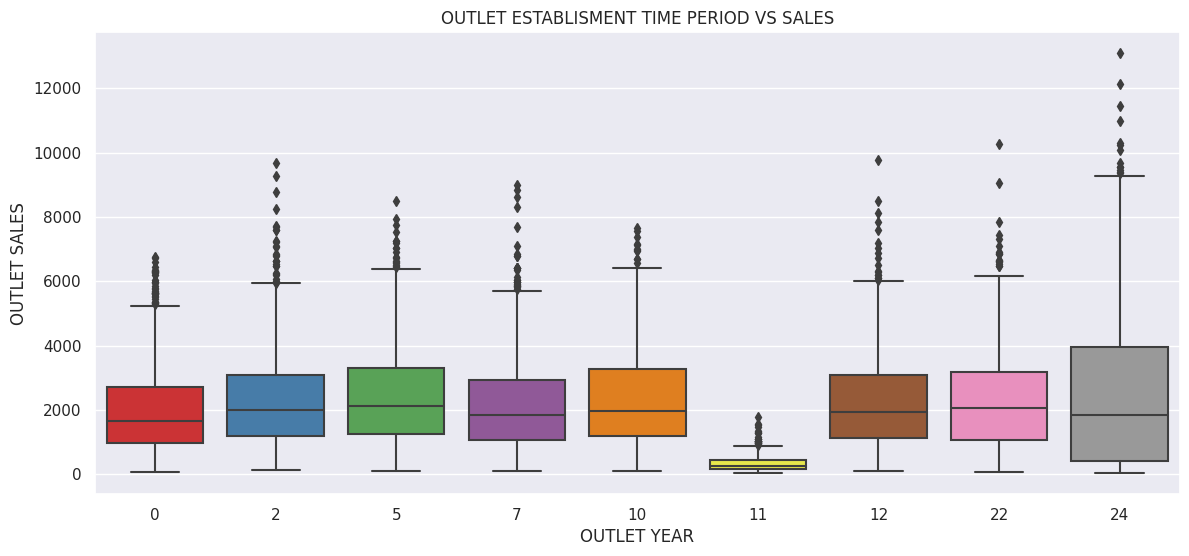

In [ ]:
sns.set(rc={"figure.figsize":(14,6)})
ax = sns.boxplot(x='Outlet_Years' ,y='Item_Outlet_Sales',data=bigmart_df_final,palette='Set1')
plt.title('OUTLET ESTABLISMENT TIME PERIOD VS SALES')
plt.xlabel('OUTLET YEAR')
plt.ylabel('OUTLET SALES')
plt.show()

**OBSERVATION:**
*   It is quiet evident that Outlets established 24 years before is having good Sales margin.
We also have a outlet which was established before 11 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.



In [ ]:
bigmart_df_final.drop(columns=['Outlet_Establishment_Year'],inplace=True)

### **AVERAGE SALES PER OUTLET**

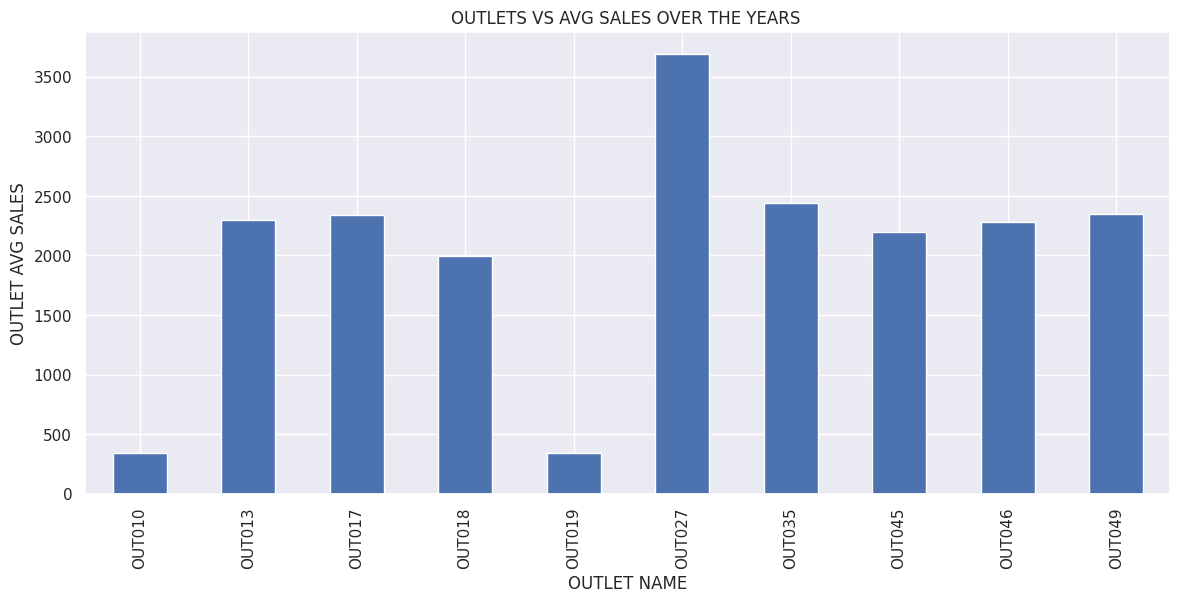

In [ ]:
bigmart_df_final.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot.bar()
plt.title('OUTLETS VS AVG SALES OVER THE YEARS ')
plt.xlabel('OUTLET NAME')
plt.ylabel('OUTLET AVG SALES')
plt.show()

**OBSERVATION:**
*   Outlet OUT027 is bringing in maximum sales whereas OUT010,OUT019 are performing poorly.



### **FINDING OUTLIERS**

In [ ]:
bigmart_df_final.head(2)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Fat_Contents,Outlet_Years
Outlet_Establishment_Year,,,,,,,,,,,,,
1999,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,Low Fat,10
2009,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,Regular,0


In [ ]:
bigmart_df_final['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<Axes: xlabel='Item_Outlet_Sales'>

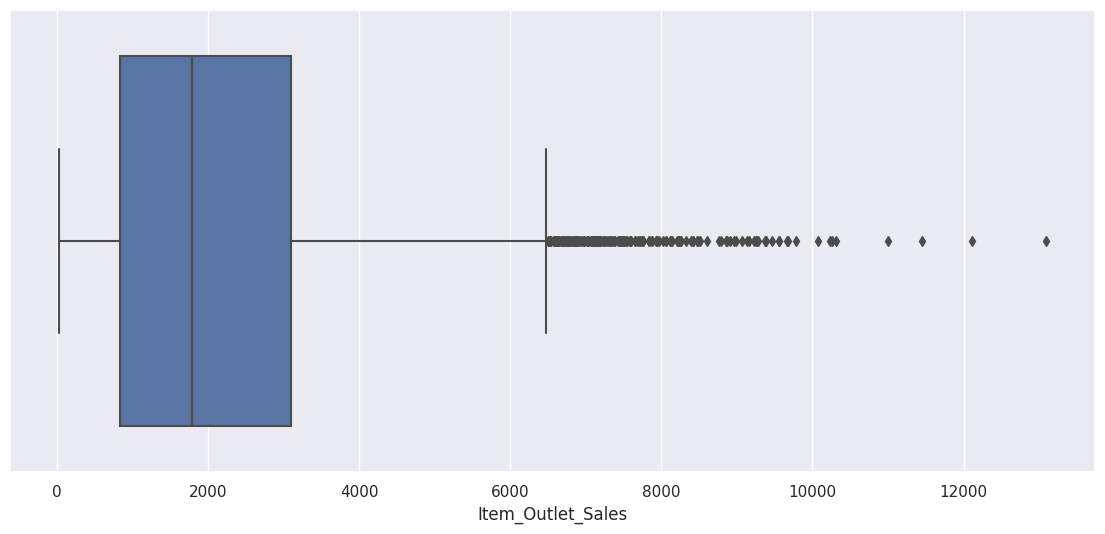

In [ ]:
sns.boxplot(x='Item_Outlet_Sales',data=bigmart_df_final)

In [ ]:
percentile25 = bigmart_df_final['Item_Outlet_Sales'].quantile(0.25)
percentile75 = bigmart_df_final['Item_Outlet_Sales'].quantile(0.75)
iqr=percentile75-percentile25
print(percentile25)
print(percentile75)
print(iqr)

834.2474
3101.2964
2267.049


In [ ]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(f"Upper Limit: {upper_limit}")
print(f" Lower Limit: {lower_limit}")

Upper Limit: 6501.8699
 Lower Limit: -2566.3261


### **TRIMING.**

In [ ]:
outliers = bigmart_df_final[bigmart_df_final['Item_Outlet_Sales']> upper_limit]
outliers

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Item_Fat_Contents,Outlet_Years
Outlet_Establishment_Year,,,,,,,,,,,,,
2009,FDC02,21.350000,0.069103,Canned,259.9278,OUT018,Medium,Tier 3,Supermarket Type2,6768.5228,Food,Low Fat,0
1985,FDY25,12.857645,0.033810,Canned,180.5976,OUT027,Medium,Tier 3,Supermarket Type3,7968.2944,Food,Low Fat,24
1985,NCR53,12.857645,0.144338,Health and Hygiene,224.4404,OUT027,Medium,Tier 3,Supermarket Type3,6976.2524,Non-Consumable,Low Fat,24
1999,FDP16,18.600000,0.039356,Frozen Foods,246.3802,OUT049,Medium,Tier 1,Supermarket Type1,7370.4060,Food,Low Fat,10
1985,FDI24,12.857645,0.078362,Baking Goods,177.9370,OUT027,Medium,Tier 3,Supermarket Type3,6704.6060,Food,Low Fat,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,DRJ39,20.250000,0.036400,Dairy,219.3482,OUT045,Small,Tier 2,Supermarket Type1,8323.8316,Drinks,Low Fat,7
2007,FDQ24,15.700000,0.074083,Baking Goods,253.3724,OUT017,Small,Tier 2,Supermarket Type1,6795.1548,Food,Low Fat,2
2002,FDY55,16.750000,0.081485,Fruits and Vegetables,258.0988,OUT045,Small,Tier 2,Supermarket Type1,8994.9580,Food,Low Fat,7


In [ ]:
# bm_df= bigmart_df_final[bigmart_df_final['Item_Outlet_Sales']< upper_limit]
# bm_df.shape

In [ ]:
# bm_df

In [ ]:
# bigmart_df_final

### **CAPPING**

In [ ]:
bm_df=bigmart_df_final.copy()

bm_df['Item_Outlet_Sales']=np.where(
   bm_df['Item_Outlet_Sales']>upper_limit,
   upper_limit,
   np.where(
   bm_df['Item_Outlet_Sales']<lower_limit,
   lower_limit,
   bm_df['Item_Outlet_Sales']
   )
)

In [ ]:
bm_df.shape

(8523, 13)

<Axes: ylabel='Item_Outlet_Sales'>

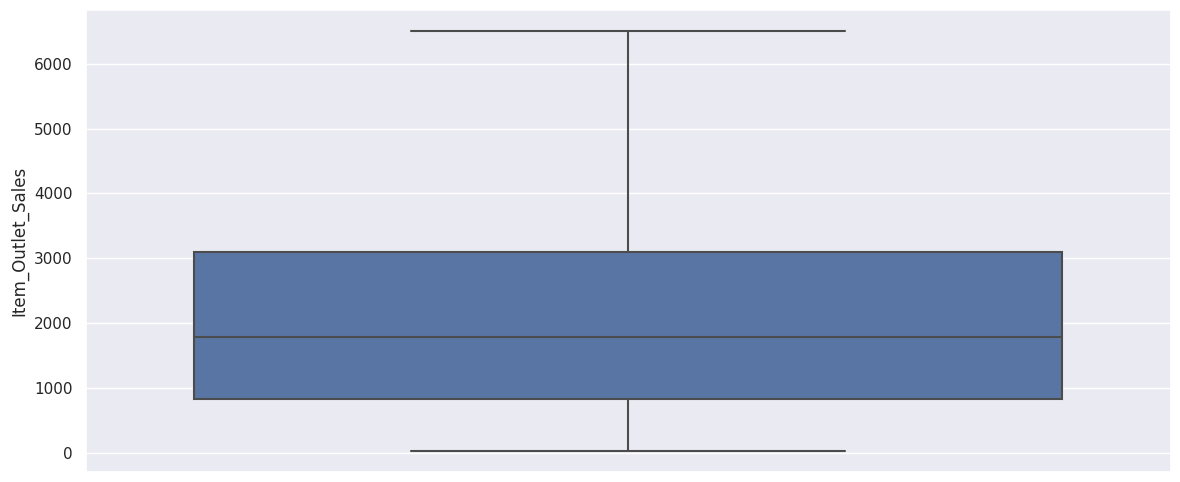

In [ ]:
sns.boxplot(y='Item_Outlet_Sales',data=bm_df)

## **PREPARING DATA FOR ML MODEL TRAINING.**

### **LABEL ENCODING**

In [ ]:
get_categorical_columns(bigmart_df_final)

['Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_Combined',
 'Item_Fat_Contents']

In [ ]:
encoder=LabelEncoder()

In [ ]:
bigmart_df_final['Item_Identifier']=encoder.fit_transform(bigmart_df_final['Item_Identifier'])

bigmart_df_final['Item_Type']=encoder.fit_transform(bigmart_df_final['Item_Type'])

bigmart_df_final['Outlet_Identifier']=encoder.fit_transform(bigmart_df_final['Outlet_Identifier'])

bigmart_df_final['Outlet_Size']=encoder.fit_transform(bigmart_df_final['Outlet_Size'])

bigmart_df_final['Outlet_Location_Type']=encoder.fit_transform(bigmart_df_final['Outlet_Location_Type'])

bigmart_df_final['Outlet_Type']=encoder.fit_transform(bigmart_df_final['Outlet_Type'])

bigmart_df_final['Item_Fat_Contents']=encoder.fit_transform(bigmart_df_final['Item_Fat_Contents'])

bigmart_df_final['Item_Type_Combined']=encoder.fit_transform(bigmart_df_final['Item_Type_Combined'])

In [ ]:
bm_df['Item_Identifier']=encoder.fit_transform(bm_df['Item_Identifier'])

bm_df['Item_Type']=encoder.fit_transform(bm_df['Item_Type'])

bm_df['Outlet_Identifier']=encoder.fit_transform(bm_df['Outlet_Identifier'])

bm_df['Outlet_Size']=encoder.fit_transform(bm_df['Outlet_Size'])

bm_df['Outlet_Location_Type']=encoder.fit_transform(bm_df['Outlet_Location_Type'])

bm_df['Outlet_Type']=encoder.fit_transform(bm_df['Outlet_Type'])

bm_df['Item_Fat_Contents']=encoder.fit_transform(bm_df['Item_Fat_Contents'])

bm_df['Item_Type_Combined']=encoder.fit_transform(bm_df['Item_Type_Combined'])

### **PD DUMMIES**

In [ ]:
bigmart_df_final = pd.get_dummies(bigmart_df_final, columns=['Item_Fat_Contents','Outlet_Location_Type','Outlet_Size','Outlet_Type'
                                  ,'Outlet_Identifier','Item_Type_Combined'])

In [ ]:
bm_df = pd.get_dummies(bm_df, columns=['Item_Fat_Contents','Outlet_Location_Type','Outlet_Size','Outlet_Type'
                                  ,'Outlet_Identifier','Item_Type_Combined'])

In [ ]:
bigmart_df_final.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Years', 'Item_Fat_Contents_0',
       'Item_Fat_Contents_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2'],
      dtype='object')

In [ ]:
bm_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Years', 'Item_Fat_Contents_0',
       'Item_Fat_Contents_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None)
bigmart_df_final.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Contents_0,Item_Fat_Contents_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
Outlet_Establishment_Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999,156,9.300,0.016047,4,249.8092,3735.1380,10,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2009,8,5.920,0.019278,14,48.2692,443.4228,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1999,662,17.500,0.016760,10,141.6180,2097.2700,10,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1987,1297,8.930,0.066132,9,53.8614,994.7052,22,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2009,758,10.395,0.066132,0,51.4008,556.6088,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
pd.set_option('display.max_columns', None)
bm_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Contents_0,Item_Fat_Contents_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
Outlet_Establishment_Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999,156,9.300,0.016047,4,249.8092,3735.1380,10,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2009,8,5.920,0.019278,14,48.2692,443.4228,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1999,662,17.500,0.016760,10,141.6180,2097.2700,10,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1987,1297,8.930,0.066132,9,53.8614,994.7052,22,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2009,758,10.395,0.066132,0,51.4008,556.6088,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
bigmart_df_final.drop(columns=['Item_Type'],inplace=True)

In [ ]:
bm_df.drop(columns=['Item_Type'],inplace=True)

### **SPLITTING THE DATA AS FEATURES AND TARGET COLUMN**

In [ ]:
X=bigmart_df_final.drop(columns=['Item_Outlet_Sales'])

In [ ]:
X_bm_df =bm_df.drop(columns=['Item_Outlet_Sales'])

In [ ]:
y=bigmart_df_final['Item_Outlet_Sales']

In [ ]:
y_bm_df = bm_df['Item_Outlet_Sales']

In [ ]:
X.head(1)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Contents_0,Item_Fat_Contents_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
Outlet_Establishment_Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999,156,9.3,0.016047,249.8092,10,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
y

Outlet_Establishment_Year
1999    3735.1380
2009     443.4228
1999    2097.2700
1987     994.7052
2009     556.6088
          ...    
1998     425.4462
1998     159.7920
1998     431.4384
1998      45.2744
1998     424.7804
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [ ]:
X_bm_df.head(1)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Contents_0,Item_Fat_Contents_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
Outlet_Establishment_Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999,156,9.3,0.016047,249.8092,10,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
y_bm_df

Outlet_Establishment_Year
1999    3735.1380
2009     443.4228
1999    2097.2700
1987     994.7052
2009     556.6088
          ...    
1998     425.4462
1998     159.7920
1998     431.4384
1998      45.2744
1998     424.7804
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### **SPLITTING THE DATA INTO TRAINING AND TESTING DATA**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6818, 30) (1705, 30) (6818,) (1705,)


In [ ]:
X_bm_df_train,X_bm_df_test,y_bm_df_train,y_bm_df_test=train_test_split(X_bm_df,y_bm_df,test_size=0.2,random_state=2)

In [ ]:
print(X_bm_df_train.shape,X_bm_df_test.shape,y_bm_df_train.shape,y_bm_df_test.shape)

(6818, 30) (1705, 30) (6818,) (1705,)


## **MACHINE LEARNING MODEL TRAINING**








### **MODEL : XGB-REGRESSOR**

In [ ]:
regressor=XGBRegressor()

In [ ]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**EVALUATION**

TRAINING DATA EVALUATION.

In [ ]:
from sklearn.metrics import mean_squared_error
training_data_predictions=regressor.predict(X_train)
r2_train=metrics.r2_score(y_train,training_data_predictions)
print(r2_train)


0.8471948070759953


TESTING DATA EVALUATION

In [ ]:
testing_data_predictions=regressor.predict(X_test)
r2_test=metrics.r2_score(y_test,testing_data_predictions)
print(r2_test)

0.5481931995357663


**GRID SEARCH CV FOR XGB-REGRERESSOR**

In [ ]:
# from sklearn.model_selection import GridSearchCV

# parameters = {
#               'objective':['reg:linear'],
#               'learning_rate': [0.01,0.02,0.3], #so called `eta` value
#               'max_depth': [3,6,9,10],
#               'min_child_weight': [4,5,6],
#               'n_estimators': [100,300,500]}

# xgb_grid = GridSearchCV(regressor,
#                         parameters,
#                         cv = 5,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(X_train,y_train)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

**XGB-REGRESSOR AFTER HYPER PARAMETER TUNNING**

In [ ]:
# MODEL INSTANTIATION
regressor=XGBRegressor(learning_rate= 0.01,
                       max_depth= 3,
                       min_child_weight= 4,
                       n_estimators= 500)

# MODEL TRAINING
regressor.fit(X_train,y_train)

# PREDICTIONS
predictions_XGB_test=regressor.predict(X_test)

# EVALUATION
r2_test=metrics.r2_score(y_test,predictions_XGB_test)
print(r2_test)

0.6160742678191764


**FEATURE SELECTION FOR XGB-REGRESSOR**

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(XGBRegressor(learning_rate= 0.01,
                       max_depth= 3,
                       min_child_weight= 4,
                       n_estimators= 500),
          n_features_to_select=20)

rfe.fit(X_train,y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print(selected_features)


Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Years', 'Item_Fat_Contents_0', 'Item_Fat_Contents_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Outlet_Identifier_2', 'Outlet_Identifier_6', 'Outlet_Identifier_7',
       'Outlet_Identifier_8', 'Outlet_Identifier_9'],
      dtype='object')


**XGB-REGRESSOR MODEL BASED ON BEST SELECTED FEATUERS AND HYPER PARAMETER TUNNED**

In [ ]:
X=bigmart_df_final[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Years', 'Item_Fat_Contents_0', 'Item_Fat_Contents_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Outlet_Identifier_2', 'Outlet_Identifier_6', 'Outlet_Identifier_7',
       'Outlet_Identifier_8', 'Outlet_Identifier_9']]
y = bigmart_df_final['Item_Outlet_Sales']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6818, 19) (1705, 19) (6818,) (1705,)


In [ ]:
regressor=XGBRegressor(learning_rate= 0.01,
                       max_depth= 3,
                       min_child_weight= 4,
                       n_estimators= 500)

# MODEL TRAINING
regressor.fit(X_train,y_train)

# PREDICTIONS
predictions_XGB_test=regressor.predict(X_test)

# EVALUATION
r2_test=metrics.r2_score(y_test,predictions_XGB_test)
print(r2_test)

0.6163078797201611


### **XGB REGRESSOR ON OUTLIERS CLIPPED DATA**

In [ ]:
regressor=XGBRegressor()
regressor.fit(X_bm_df_train,y_bm_df_train)

training_bm_df_data_predictions=regressor.predict(X_bm_df_train)
r2_train_bm_df=metrics.r2_score(y_bm_df_train,training_bm_df_data_predictions)
print(r2_train)


0.8471948070759953


In [ ]:
testing_bm_df_data_predictions=regressor.predict(X_bm_df_test)
r2_test=metrics.r2_score(y_bm_df_test,testing_bm_df_data_predictions)
print(r2_test)

0.5589168939634473


In [ ]:
# from sklearn.model_selection import GridSearchCV

# parameters = {
#               'objective':['reg:linear'],
#               'learning_rate': [0.01,0.02,0.3], #so called `eta` value
#               'max_depth': [3,6,9,10],
#               'min_child_weight': [4,5,6],
#               'n_estimators': [100,300,500]}

# xgb_grid = GridSearchCV(regressor,
#                         parameters,
#                         cv = 5,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(X_bm_df_train,y_bm_df_train)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [ ]:
x_bm_df=bm_df.drop(columns=['Item_Outlet_Sales','Outlet_Identifier_0','Outlet_Identifier_1','Outlet_Identifier_2'
                    ,'Outlet_Identifier_3','Outlet_Identifier_4','Outlet_Identifier_5','Outlet_Identifier_6',
                    'Outlet_Identifier_7','Outlet_Identifier_8','Outlet_Identifier_9','Item_Identifier',"Item_Weight"])       #'Item_Identifier',"Item_Weight",'Item_Outlet_Sales'
y_bm_df = bm_df['Item_Outlet_Sales']

X_bm_df_train,X_bm_df_test,y_bm_df_train,y_bm_df_test=train_test_split(X_bm_df,y_bm_df,test_size=0.2,random_state=2)


regressor=XGBRegressor(learning_rate=0.01,max_depth=3,min_child_weight=4,
                       n_estimators=500,objective='reg:linear')

regressor.fit(X_bm_df_train,y_bm_df_train)

testing_bm_df_data_predictions=regressor.predict(X_bm_df_test)
r2_test=metrics.r2_score(y_bm_df_test,testing_bm_df_data_predictions)
print(r2_test)

[18:50:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
0.6229188994878321



**CONCLUSION:**

**EVALUATION CHECK POINTS**


**1.XGB REGRESSOR EVALUATION ---> 0.54**

**2.XGB REGRESSOR EVALUATION HPT ---> 0.61/0.62**




### **RANDOM FOREST REGRESSOR**

In [ ]:
X=bigmart_df_final.drop(columns=['Item_Outlet_Sales'])
y=bigmart_df_final['Item_Outlet_Sales']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6818, 30) (1705, 30) (6818,) (1705,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

# Train the model
regressor.fit(X_train, y_train)

# Make predictions
predictions = regressor.predict(X_test)

# Evaluate the model
print(metrics.r2_score(y_test,predictions))

0.5844688063095884


**GRID-SEARCH CV FOR RANDOM FOREST**

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'max_samples': [0.5, 0.7,1.0,],
#     'max_depth': [5,7,9],
#     'min_samples_split': [2, 5, 10]
# }

# # Create the grid search object
# grid_search = GridSearchCV(regressor, param_grid, cv=5,verbose=True)

# # Fit the grid search object to the data
# grid_search.fit(X_train,y_train)

# # Print the best parameters
# print(grid_search.best_score_)
# print(grid_search.best_params_)

**HYPER PARAMETER TUNNING RANDOM FOREST REGRESSOR.**

In [ ]:
regressor = RandomForestRegressor(n_estimators=100,
                                  max_depth=10,
                                  max_samples= 0.7,
                                  min_samples_split= 15,
                                  )

# Train the model
regressor.fit(X_train, y_train)

# Make predictions
predictions = regressor.predict(X_test)

# Evaluate the model
print(metrics.r2_score(y_test,predictions))

0.6155081307187197


**FEATURE SELECTION FOR MODEL RANDOM FOREST**

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestRegressor(n_estimators=100,
                                  max_depth=5,
                                  max_samples= 0.5,
                                  min_samples_split= 15), n_features_to_select=20)
# Fit the RFE object to the data
rfe.fit(X_train,y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print(selected_features)


Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Years', 'Item_Fat_Contents_0', 'Item_Fat_Contents_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_Identifier_2',
       'Outlet_Identifier_3', 'Outlet_Identifier_4', 'Outlet_Identifier_5',
       'Outlet_Identifier_6', 'Item_Type_Combined_0'],
      dtype='object')


**MODEL BASED ON BEST FEATURES AND HPT**

In [ ]:
X=bigmart_df_final[['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Years', 'Item_Fat_Contents_0', 'Item_Fat_Contents_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_Identifier_2',
       'Outlet_Identifier_3', 'Outlet_Identifier_4', 'Outlet_Identifier_5',
       'Outlet_Identifier_6', 'Item_Type_Combined_0']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)



(6818, 20) (1705, 20) (6818,) (1705,)


In [ ]:
regressor = RandomForestRegressor(n_estimators=100,
                                  max_depth=5,
                                  max_samples= 0.5,
                                  min_samples_split= 15,
                                  )

# Train the model
regressor.fit(X_train, y_train)

# Make predictions
predictions = regressor.predict(X_test)

# Evaluate the model
print(metrics.r2_score(y_test,predictions))

0.6123807830762327


In [ ]:
x_bm_df=bm_df.drop(columns=['Item_Outlet_Sales','Outlet_Identifier_0','Outlet_Identifier_1','Outlet_Identifier_2'
                    ,'Outlet_Identifier_3','Outlet_Identifier_4','Outlet_Identifier_5','Outlet_Identifier_6',
                    'Outlet_Identifier_7','Outlet_Identifier_8','Outlet_Identifier_9','Item_Identifier',"Item_Weight"])
y_bm_df = bm_df['Item_Outlet_Sales']

X_bm_df_train,X_bm_df_test,y_bm_df_train,y_bm_df_test=train_test_split(X_bm_df,y_bm_df,test_size=0.2,random_state=2)

regressor = RandomForestRegressor(n_estimators=200,
                                  max_depth=10,
                                  max_samples= 0.5,
                                  min_samples_split= 15,
                                  )


regressor.fit(X_bm_df_train,y_bm_df_train)

testing_bm_df_data_predictions=regressor.predict(X_bm_df_test)
r2_test=metrics.r2_score(y_bm_df_test,testing_bm_df_data_predictions)
print(r2_test)

0.6174611405971893


### **LINEAR REGRESSION**

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

X=bigmart_df_final.drop(columns=['Item_Outlet_Sales'])
y=bigmart_df_final['Item_Outlet_Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)

regressor = linear_model.LinearRegression()

regressor.fit(X_train_std, y_train)

# Make predictions
predictions = regressor.predict(X_test_std)

# Evaluate the model
print(metrics.r2_score(y_test,predictions))


0.5739680449491213


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(linear_model.LinearRegression(), n_features_to_select=20)
# Fit the RFE object to the data
rfe.fit(X_train,y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print(selected_features)

Index(['Item_Visibility', 'Item_Fat_Contents_0', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Outlet_Identifier_0', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Item_Type_Combined_1'],
      dtype='object')


### **RIDGE REGRESSION**

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge

X=bigmart_df_final.drop(columns=['Item_Outlet_Sales'])
y=bigmart_df_final['Item_Outlet_Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

ridge_model = Ridge()

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = ridge_model.predict(X_test)

print(metrics.r2_score(y_test,predictions))

0.5740953693995138


**HYPER PARAMETERS USING GRID SEARCH**

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_iter':[100,300,500,1000],
#     'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]

# }

# # Create the grid search object
# grid_search = GridSearchCV(ridge_model, param_grid=param_grid, cv=5)

# # Fit the grid search object to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters
# print(grid_search.best_params_)

In [ ]:
ridge_model = Ridge(solver ='sparse_cg',alpha=0.1, max_iter= 200,)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = ridge_model.predict(X_test)

print(metrics.r2_score(y_test,predictions))

0.5739935866493437


### **LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso

X=bigmart_df_final.drop(columns=['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier_0', 'Outlet_Identifier_1',
        'Outlet_Identifier_2', 'Outlet_Identifier_3','Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9'])
y=bigmart_df_final['Item_Outlet_Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)


lasso_model = Lasso(alpha=0.97)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = lasso_model.predict(X_test)

print(metrics.r2_score(y_test,predictions))

0.5724372680414953


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {"alpha": np.arange(0.00, 1.0, 0.01)}

# # Create the grid search object
# grid_search = GridSearchCV(lasso_model, param_grid=param_grid, scoring="r2", cv=5)

# # Fit the grid search object to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters
# print(grid_search.best_params_)


**THE BEST ACCURACY WAS 62.22 GIVEN BY XGB REGRESSOR**